### Visualize CMS data from the Medicare-Provider-Utilization-Payment public use file, year 2012.
Janos A. Perge, 7/31/2016

To assess the risk associated with a medical procedure, one needs to better  
understand the physician who carries out the procedure. This is a visualization exercise  
exploring the relationships between medical procedures and their cost across physician specialities.

Before running this script, first run procedures_by_provider2.r to open, rearrange, combine and save CMS data  
needed for this visualization exercise. 

In [82]:
# load R-packages
rm(list=ls())

packageList = c("data.table","stringr",'plyr', 'ggplot2')

is_installed <- function(mypkg) is.element(mypkg, installed.packages()[,1])

load_or_install<-function(package_names)
{
  for(package_name in package_names)
  {
    if(!is_installed(package_name))
    {
      install.packages(package_name,repos="http://lib.stat.cmu.edu/R/CRAN")
    }
    options(java.parameters = "-Xmx8g")
    library(package_name,character.only=TRUE,quietly=TRUE,verbose=FALSE)
  }
}

load_or_install(packageList)

#### Load and inspect data

In [83]:
data_filename = 'provider_vs_procedures_2_2012.RData'

start = Sys.time()
load(data_filename)
Sys.time()-start

Time difference of 7.186254 secs

In [84]:
physician_info = data.table(physician_info, key='provider_type')
head(physician_info)

,npi,nppes_provider_last_org_name,nppes_provider_first_name,nppes_provider_mi,nppes_credentials,nppes_provider_gender,nppes_entity_code,nppes_provider_street1,nppes_provider_street2,nppes_provider_city,nppes_provider_zip,nppes_provider_state,nppes_provider_country,provider_type,medicare_participation_indicator,place_of_service,medical.school.name,graduation.year
1,1003833625,PETERSON,JOHN,,M.D.,M,I,1400 W PARK ST,,URBANA,618012334,IL,US,Addiction Medicine,Y,O,UNIVERSITY OF ILLINOIS AT CHICAGO HEALTH SCIENCE CENTER,1989
2,1003975954,THRASHER,BRENTON,D,M.D.,M,I,811 S J ST,,LAKE WORTH,334605043,FL,US,Addiction Medicine,Y,O,NA,NA
3,1003998329,JONES,DOUGLAS,E,M.D.,M,I,6005 PARK AVENUE,SUITE 307,MEMPHIS,381195213,TN,US,Addiction Medicine,Y,O,OTHER,1984
4,1013202266,KERN,AUDREY,M,MD,F,I,255 ROUTE 108,,SOMERSWORTH,038781543,NH,US,Addiction Medicine,Y,O,OTHER,1988
5,1013952175,REZNIKOFF,CHARLES,P,MD,M,I,807 PARK AVE,,MINNEAPOLIS,554041136,MN,US,Addiction Medicine,Y,F,UNIVERSITY OF WISCONSIN MEDICAL SCHOOL,2002
6,1013952852,ROUT,W,R,MD,M,I,1600 SW ARCHER RD,,GAINESVILLE,326103003,FL,US,Addiction Medicine,Y,O,NA,NA


In [88]:
# Combine different procedures per provider for showing overall workload:
npi_vs_tot_count = npi_vs_ccs[, .(tot_cnt = sum(proc_cnt), med_efficacy=median(med_proc_per_patient), 
                                  tot_pay=sum(est_pay_amt), tot_bene=sum(bene_cnt)), by=npi]
npi_vs_tot_count = npi_vs_tot_count[,avg_pay := tot_pay/tot_cnt]

In [85]:
head(npi_vs_ccs)

,npi,ccs_code,proc_cnt,uniq_cnt,day_srvc_cnt,bene_cnt,med_proc_per_patient,est_allo_amt,est_pay_amt
1,1.003000e+09,2.270000e+02,1.224000e+03,9.130000e+02,1.224000e+03,9.130000e+02,1.056818e+00,1.113588e+05,8.888709e+04
2,1.003000e+09,2.340000e+02,7.673000e+03,4.464000e+03,5.276000e+03,4.464000e+03,1.271663e+00,2.867675e+05,2.210911e+05
3,1.003000e+09,2.270000e+02,5.200000e+01,4.500000e+01,5.200000e+01,4.500000e+01,1.205882e+00,6.077120e+03,4.760960e+03
4,1.00300e+09,2.12000e+02,2.30000e+01,2.30000e+01,2.30000e+01,2.30000e+01,1.00000e+00,1.68981e+03,1.34881e+03
5,1.003000e+09,2.130000e+02,8.110000e+02,9.000000e+01,6.080000e+02,9.000000e+01,6.696970e+00,1.943511e+04,1.506231e+04
6,1.003000e+09,5.400000e+01,2.000000e+01,1.700000e+01,1.900000e+01,1.700000e+01,1.176471e+00,2.429800e+03,1.943800e+03


In [86]:
head(conversion_table)

,hcpcs_code,hcpcs_description,ccs_code,css_desc
1,00100,Anesthesia for procedure on salivary gland with biopsy,232,Anesthesia
2,00102,Anesthesia for procedure to repair lip defect present at birth,232,Anesthesia
3,00103,Anesthesia for procedure on eyelid,232,Anesthesia
4,00104,Anesthesia for electric shock treatment,232,Anesthesia
5,00120,Anesthesia for biopsy of external middle and inner ear,232,Anesthesia
6,00126,Anesthesia for incision of ear drum,232,Anesthesia


In [101]:
# top provider specialities and head-counts:
counts = data.table(table(physician_info$provider_type))
#range(counts$Freq)
counts = setorder(counts, -N, na.last=TRUE)
top10 = counts[seq(1,30),]
midTierSpecialities = counts[seq(21,32),]
top10

,V1,N
1,Internal Medicine,91525
2,Family Practice,77792
3,Nurse Practitioner,52196
4,Physician Assistant,40403
5,Emergency Medicine,37254
6,Physical Therapist,36784
7,Chiropractic,36399
8,Mass Immunization Roster Biller,33013
9,Anesthesiology,32641
10,CRNA,30160


#### Diversity of revenues across specialities

In [239]:
setkey(physician_info,npi)
sub_npi_ccs = npi_vs_tot_count[physician_info] 

In [244]:
median.proc.pay.spec = sub_npi_ccs[, .(med.proc = median(avg_pay), med.pay = median(tot_cnt)), by=provider_type]
median.proc.pay.spec = setorder(median.proc.pay.spec, med.pay, na.last=TRUE)
median.proc.pay.spec = median.proc.pay.spec[seq(60,79),]
providers = median.proc.pay.spec$provider_type

In [243]:
median.proc.pay.spec

,provider_type,med.proc,med.pay
1,Maxillofacial Surgery,49.6816889189953,31
2,Oral Surgery (dentists only),55.56,35
3,Certified Nurse Midwife,38.875,36
4,Anesthesiologist Assistants,74.0555000001,58
5,Sleep Medicine,80.446025531156,66
6,CRNA,94.09269019982,73
7,Plastic and Reconstructive Surgery,73.1029273385183,132
8,Anesthesiology,99.4636249996625,145
9,Registered Dietician/Nutrition Professional,27.4390697674419,168
10,Licensed Clinical Social Worker,35.262253521,191


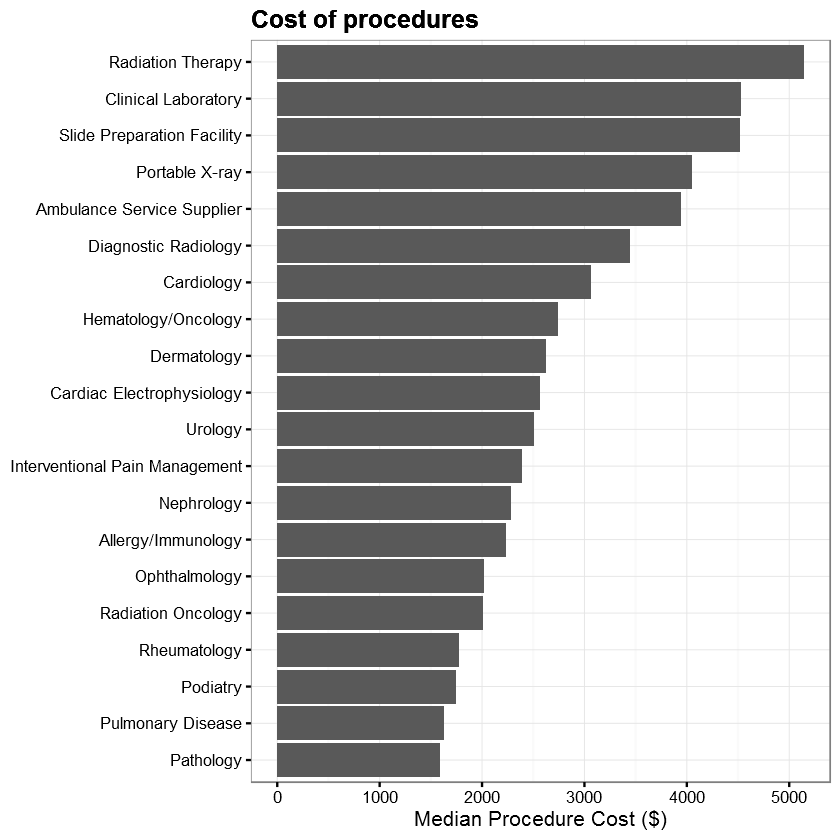

In [195]:
g <- ggplot(median.proc.pay.spec, aes(x=provider_type, y=med.pay)) 
g + geom_bar(position="dodge",stat="identity") +coord_flip() +
    ggtitle("Cost of procedures")+
    labs(y='Median Procedure Cost ($)')+
    scale_fill_grey()+
    theme_bw()+
    scale_x_discrete(limits=median.proc.pay.spec$provider_type)+
    theme(
      axis.title.y=element_blank(),                            #removes y-axis label
      text=element_text(family="serif"),                       #changes font on entire graph
      plot.title=element_text(face="bold",hjust=c(0,0)) #changes font face and location for graph title
      )

1) Above: Medical specialities show large differences in workload and pay   

#### Diversity of revenues within a speciality

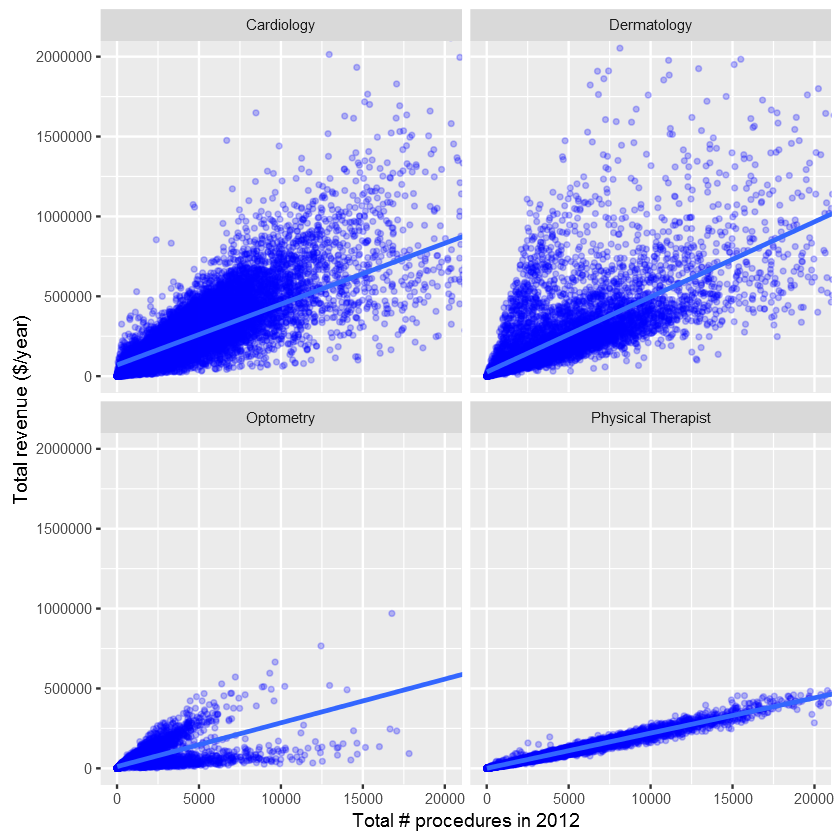

In [176]:
#select multiple specialities
phys_sel = c('Dermatology', 'Physical Therapist', 'Cardiology', 'Optometry')
cc = physician_info[provider_type %in% phys_sel] #provider info (and list of NPIs) within the top popular provider types. 
setkey(cc,nppes_entity_code)  #remove organizations
cc = cc[nppes_entity_code=='I']
setkey(cc,npi) # join on selected npi numbers (of popular types), pulling the npi specific info into procedure count
sub_npi_ccs = npi_vs_tot_count[cc] 

g <- ggplot(sub_npi_ccs, aes(tot_cnt, tot_pay)) + geom_point(color = 'blue', size = 1, alpha=1/4) 
g = g + facet_wrap(~provider_type, ncol=2)+geom_smooth(method = 'lm', se=FALSE) 
g = g + coord_cartesian(xlim = c(0,20000),ylim = c(0,2000000))
g + labs(x='Total # procedures in 2012', y='Total revenue ($/year)')

2) Cost of procedures varies significantly within specialities. Each dot corresponds to a physician. Certain disciplines vary more, while others (e.g. physical therapist) the cost is much more a function of procedure counts.  
   
Some specialities could be divided into subspecialities (e.g. Dermatology, Optometry). These subspecialities
have different work loads and pay scales (e.g. instrumentation related cost?). 
Other examples of this are: 'Pathology', 'Neurology', 'Radiation Oncology'-three groups, 'Clinical Laboratory'

#### Gender inequality

In [179]:
# Male providers outnumber female ones by nearly 2-fold:
table(physician_info$nppes_provider_gender)


            F      M 
 55532 302008 523104 

In [288]:
providers = c("Clinical Laboratory", "Pathology", "Pulmonary Disease", "Podiatry", "Rheumatology", "Radiation Oncology",
              "Ophthalmology", "Allergy/Immunology", "Nephrology", "Interventional Pain Management",
              "Urology", "Cardiac Electrophysiology", "Dermatology", "Hematology/Oncology", "Cardiology",
              "Diagnostic Radiology", "Ambulance Service Supplier", "Portable X-ray", 
              "Radiation Therapy")

median.proc.pay.spec = sub_npi_ccs[, .(med.proc = median(avg_pay), 
                                   med.pay = median(tot_cnt)), 
                                   by=.(provider_type,nppes_provider_gender) ]

setkey(median.proc.pay.spec,nppes_provider_gender)
median.proc.pay.spec = median.proc.pay.spec[nppes_provider_gender  %in% c("M","F")]
setkey(median.proc.pay.spec,provider_type)
median.proc.pay.spec = median.proc.pay.spec[provider_type  %in% providers]

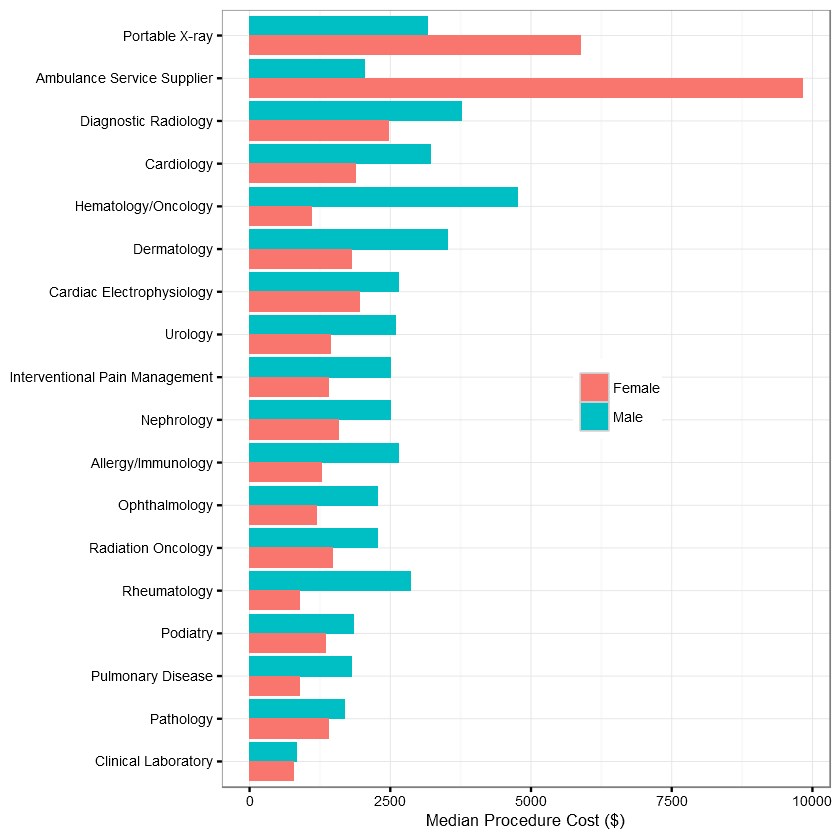

In [319]:
ggplot(data=median.proc.pay.spec, aes(x=provider_type,y=med.pay,fill=factor(nppes_provider_gender))) +
    geom_bar(position="dodge",stat="identity") + 
    coord_flip() +
    labs(y='Median Procedure Cost ($)')+
    theme_bw()+
    scale_x_discrete(limits=providers)+
    theme(
        legend.title=element_blank(),  
        legend.position=c(.65,.5),
        axis.title.y=element_blank(), #removes y-axis label
        text=element_text(family="serif",size=10), #changes font on entire graph
        plot.title=element_text(face="bold",hjust=c(0,0)) #changes font face and location for graph title
        ) +
    scale_fill_discrete(labels = c("Female", "Male")) 

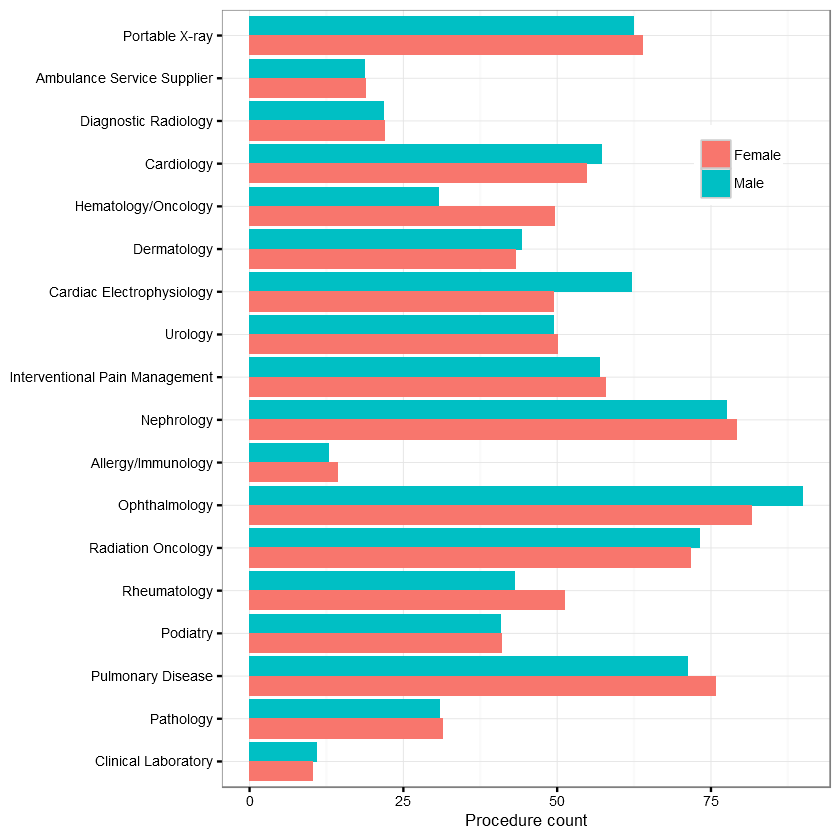

In [322]:
ggplot(data=median.proc.pay.spec, aes(x=provider_type,y=med.proc,fill=factor(nppes_provider_gender))) +
    geom_bar(position="dodge",stat="identity") + 
    coord_flip() +
    labs(y='Procedure count')+
    theme_bw()+
    scale_x_discrete(limits=providers)+
    theme(
        legend.title=element_blank(),  
        legend.position=c(.85,.8),
        axis.title.y=element_blank(), #removes y-axis label
        text=element_text(family="serif",size=10), #changes font on entire graph
        plot.title=element_text(face="bold",hjust=c(0,0)) #changes font face and location for graph title
        ) +
    scale_fill_discrete(labels = c("Female", "Male")) 

3 and 4) Male providers charge more for the services (with a few exceptions)  
Even thought female and male providers perform similar number of procedures. 

#### Physician's productivity over years of expertise

In [115]:
#Plot only data points with known graduation years (~75% of all providers)
phys.info = physician_info[!graduation.year %in% NA]

#Select for physician types:
phys_sel = c('Dermatology', 'Physical Therapist', 'Cardiology', 'Orthopedic Surgery')
cc = phys.info[provider_type %in% phys_sel] #provider info (and list of npis) within the top popular provider types. 
setkey(cc,npi)
sub_npi_ccs = npi_vs_tot_count[cc] # inner join on selected npi numbers, pulling the npi specific info into procedure count
sub_npi_ccs = sub_npi_ccs[,expyrs := 2012-graduation.year]

median_freq = sub_npi_ccs[, .(medi = median(tot_cnt), med_bene=median(as.numeric(tot_bene)), med_effic=median(med_efficacy)), by=.(expyrs, provider_type)]

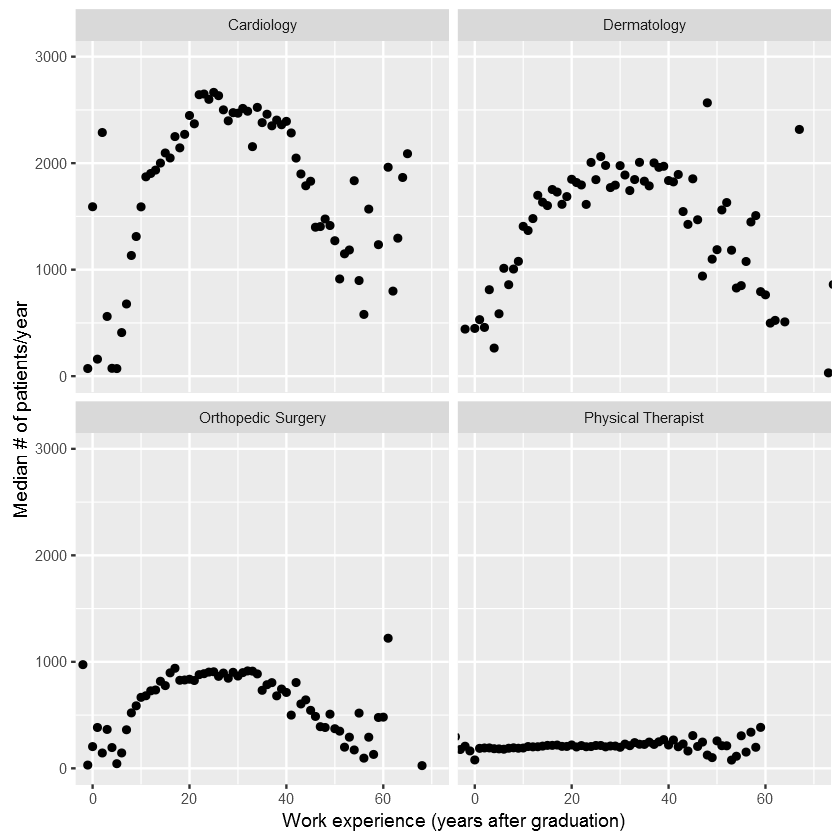

In [177]:
g <- ggplot(median_freq, aes(expyrs, med_bene)) + geom_point() 
g = g + facet_wrap(~provider_type, nrow=2) #+geom_smooth(method='lm', se=FALSE) 
g = g + coord_cartesian(xlim = c(0,70),ylim = c(0,3000))
g + labs(x='Work experience (years after graduation)', y='Median # of patients/year')

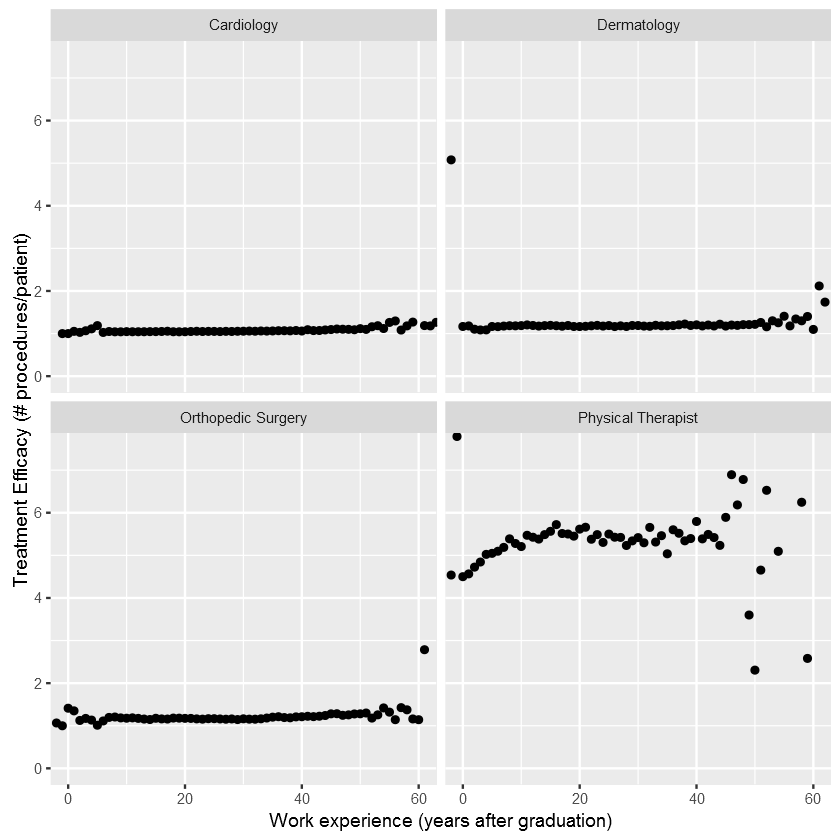

In [81]:
g <- ggplot(median_freq, aes(expyrs, med_effic)) + geom_point() 
g = g + facet_wrap(~provider_type, nrow=2) #+geom_smooth(method='lm', se=FALSE) 
g = g + coord_cartesian(xlim = c(0,60),ylim = c(0,7.5))
g + labs(x='Work experience (years after graduation)', y='Treatment Efficacy (# procedures/patient)')

4) Productivity (but not necessarily quality of care) depends on experience.    
A provider treats more patients (and performs more procedures/unit time) after years of experience. 
However, the treatment efficacy is stable over the course of the physician's career (i.e. roughly the same # of procedure/patient).
So increased output might be explained if appointment durations shorten over the years. Treatment efficacy is very close to one,
so it might be difficult to see improvement in quality of care just by looking at this measure.

#### Diversity of procedure codes across specialities

In [7]:
#Select for physician types:
phys_sel = c('Dermatology', 'Physical Therapist', 'Cardiology', 'Orthopedic Surgery')
cc = physician_info[provider_type %in% phys_sel] #provider info (and list of npis) within the top popular provider types. 
setkey(cc,npi)
sub_npi_ccs = npi_vs_ccs[cc] # join on selected npi numbers (of popular types), pulling the npi specific info into procedure count
str(sub_npi_ccs)

Classes 'data.table' and 'data.frame':	456856 obs. of  22 variables:
 $ npi                             : int  1003000381 1003000381 1003000936 1003000936 1003000936 1003000936 1003001017 1003001017 1003001017 1003001017 ...
 $ ccs_code                        : int  212 213 47 193 203 227 170 174 227 240 ...
 $ proc_cnt                        : num  23 811 32 252 11 485 802 121 706 5720 ...
 $ uniq_cnt                        : int  23 90 31 242 11 374 266 31 308 253 ...
 $ day_srvc_cnt                    : int  23 608 32 252 11 485 611 121 706 977 ...
 $ avg_allo_amt                    : num  73.5 82 233.9 144.3 25.2 ...
 $ avg_pay_amt                     : num  58.6 62.9 179.2 113.7 20.1 ...
 $ nppes_provider_last_org_name    : chr  "BRAGANZA" "BRAGANZA" "STELLINGWORTH" "STELLINGWORTH" ...
 $ nppes_provider_first_name       : chr  "LUTHER" "LUTHER" "MARK" "MARK" ...
 $ nppes_provider_mi               : chr  "Q" "Q" "A" "A" ...
 $ nppes_credentials               : chr  "PT" "PT" "MD" "

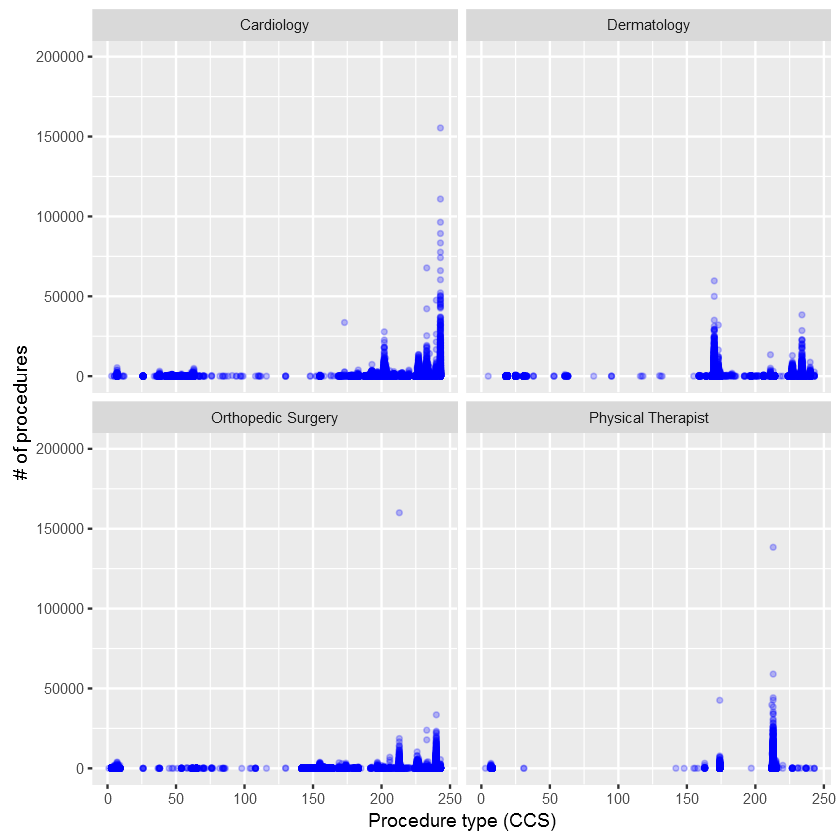

In [9]:
g <- ggplot(sub_npi_ccs, aes(ccs_code, proc_cnt)) + geom_point(color = 'blue', size = 1, alpha=1/4) 
g <- g + facet_wrap(~provider_type, nrow=1) + coord_cartesian(ylim = c(0,200000))
g + labs(x='Procedure type (CCS)', y='# of procedures')

Range of treatments could identify the provider's speciality

In [ ]:

1) Medical specialities show large differences in workload and pay
-b: Median number of procedures/year 
-c: Median annual revenue $/provider
2) Some specialities could be divided into subspecialities 
with different loads and pay scales (most likely carrying out 
different procedures with different pay scales 
(e.g. instrumentation related cost) 
3) gender unequality: # of males, females, revenue/speciality, male-female, # of procedures male-female
4) Productivity depends on experience (# procedures vs. years in practice)
5) Diversify CCS codes

remove organization

# plot the distribution of procedures (CCS code vs Total count) for the top 10 most frequent provider_types
# can we recognize provider types from their distribution?

# males have more procedures than females
# disciplines can be captured by procedure patterns
# payment scales vary between and within specialities
# something is up with dermatology
# years of experience vs. payment, vs. # of total procedures?
# look at only a few codes, in a few disciplines. Which ones?



# # of procedures performed by physician
# price of procedures -- relative to others in type, -- relative to others within same area (zipcode)
# diversity of procedures
# gender differences
# organization vs. individual
# ratings or other metrics on doctors
# geographical variations
# look at only a few types otherwise it's way too messy
# combine multiple years if necessary to get more data per type? 
# can infer age? Years after graduation =years of work experience
# Which organization the doctor belongs to. 
# What school
# Price per procedure
# Disputes? 
# Insurance rate of the doctor?
# how frequently patients return?
# check out NPI data set

In [90]:
#select a single speciality
cc = physician_info[provider_type == 'Orthopedic Surgery']
setkey(cc, npi)
sub_npi_ccs = npi_vs_ccs[cc]
head(sub_npi_ccs)

,npi,ccs_code,proc_cnt,uniq_cnt,day_srvc_cnt,bene_cnt,med_proc_per_patient,est_allo_amt,est_pay_amt,nppes_provider_last_org_name,...,nppes_provider_street2,nppes_provider_city,nppes_provider_zip,nppes_provider_state,nppes_provider_country,provider_type,medicare_participation_indicator,place_of_service,medical.school.name,graduation.year
1,1003001785,155,66,46,56,46,1.43478260869565,4318.240000008,3343.519999974,JONES,...,,CLEARWATER,337653305,FL,US,Orthopedic Surgery,Y,O,OTHER,2005
2,1003001785,226,84,73,79,73,1.11111111111111,2815.61,2252.26,JONES,...,,CLEARWATER,337653305,FL,US,Orthopedic Surgery,Y,O,OTHER,2005
3,1003001785,227,279,243,278,243,1.08,31020.32,23603.340000051,JONES,...,,CLEARWATER,337653305,FL,US,Orthopedic Surgery,Y,O,OTHER,2005
4,1003001785,240,237,46,54,46,5.15217391304348,399.8199999978,314.4899999961,JONES,...,,CLEARWATER,337653305,FL,US,Orthopedic Surgery,Y,O,OTHER,2005
5,1003002890,155,112,44,111,44,2.54545454545455,7773.930000032,6205.629999968,HAMMAN,...,SUITE 170,BRIGHTON,806014004,CO,US,Orthopedic Surgery,Y,O,UNIVERSITY OF COLORADO SCHOOL OF MEDICINE,2004
6,1003002890,227,201,162,201,162,1,18715.139999951,14272.20000005,HAMMAN,...,SUITE 170,BRIGHTON,806014004,CO,US,Orthopedic Surgery,Y,O,UNIVERSITY OF COLORADO SCHOOL OF MEDICINE,2004


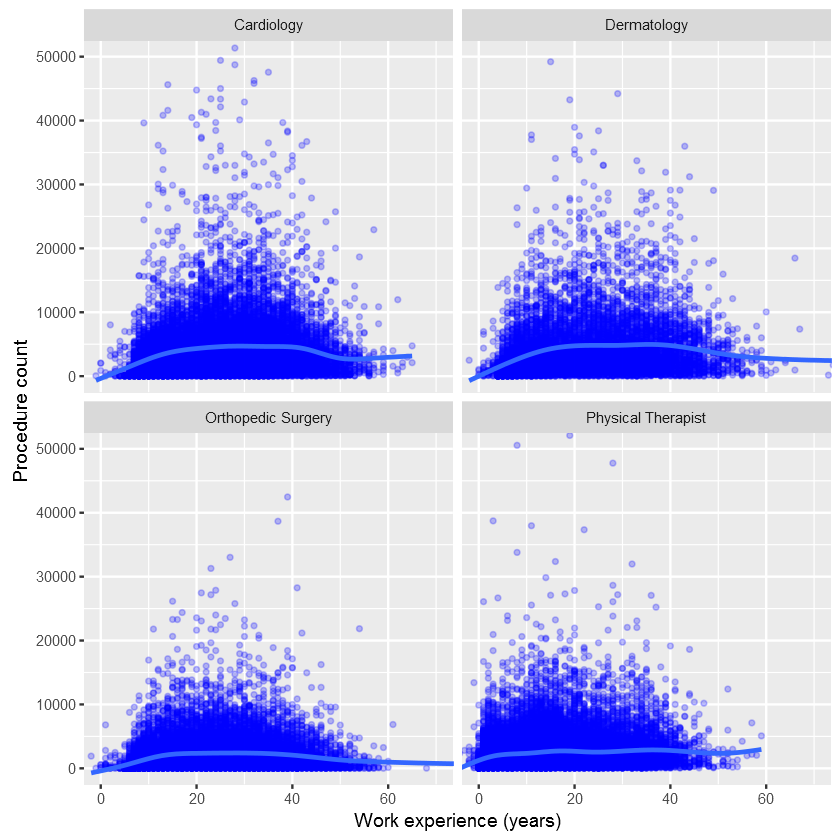

In [16]:
#scatter plot with # of procedures over years
g <- ggplot(sub_npi_ccs, aes(expyrs, tot_cnt)) + geom_point(color = 'blue', size = 1, alpha=1/4) 
g = g + facet_wrap(~provider_type, nrow=2) +geom_smooth(se=FALSE) 
g = g + coord_cartesian(xlim = c(0,70),ylim = c(0,50000))
g + labs(x='Work experience (years)', y='Procedure count')

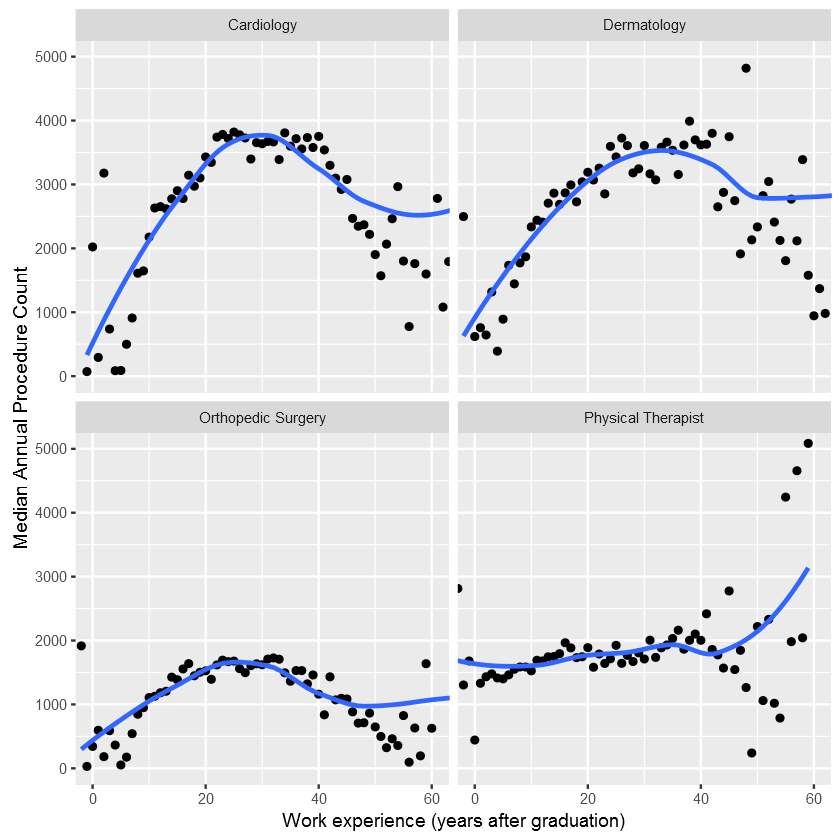

In [67]:
#scatter plot with median # of procedures over years
g <- ggplot(median_freq, aes(expyrs, medi)) + geom_point() 
g = g + facet_wrap(~provider_type, nrow=2) +geom_smooth(se=FALSE) 
g = g + coord_cartesian(xlim = c(0,60),ylim = c(0,5000))
g + labs(x='Work experience (years after graduation)', y='Median Annual Procedure Count')

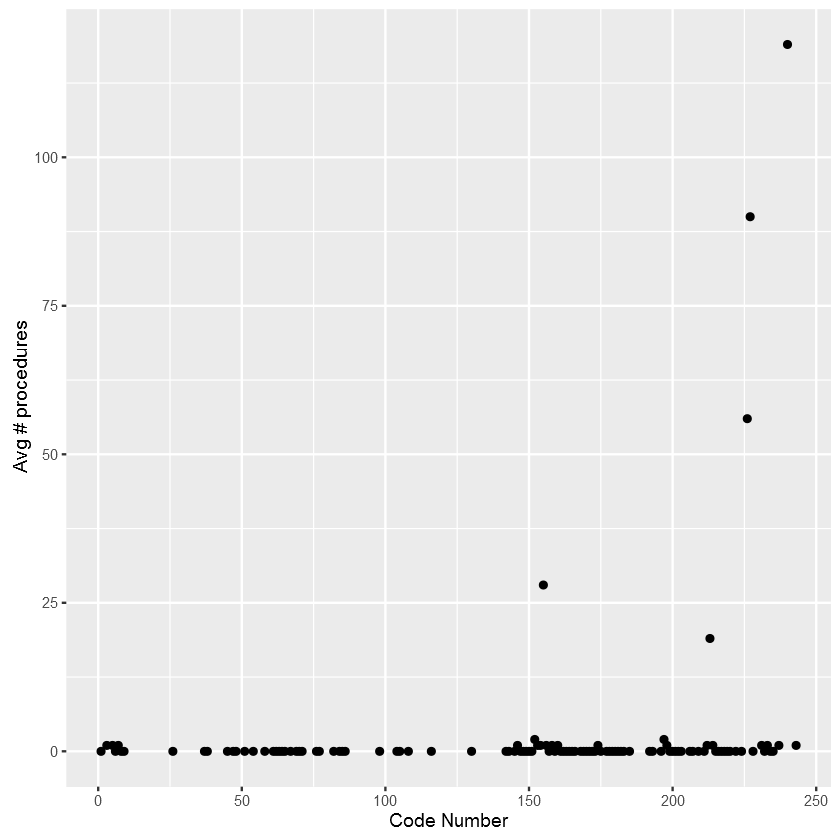

In [15]:
setkey(sub_npi_ccs,ccs_code)
cnt_per_code <- sub_npi_ccs[, sum(proc_cnt), by = ccs_code]
cnt_per_code = cnt_per_code[, V1 := round(V1/nrow(sub_npi_ccs))] #average across all physicians within the group
qplot(ccs_code, V1, data=cnt_per_code) + labs(x='Code Number', y='Avg # procedures')

In [52]:
rm(dflong)
dflong = melt(sub_npi_ccs, measure.vars = ccsCodes, variable.name = "ccs_code", value.name = "proc_cnt")
setkey(dflong,proc_cnt)
dflong = dflong[ proc_cnt != "NA"] 
setkey(dflong,npi)
dflong = setorder(dflong, npi, na.last=TRUE)
head(dflong)

Warning message:
In rm(dflong): object 'dflong' not found

,npi,nppes_provider_last_org_name,nppes_provider_first_name,nppes_provider_mi,nppes_credentials,nppes_provider_gender,nppes_entity_code,nppes_provider_street1,nppes_provider_street2,nppes_provider_city,nppes_provider_zip,nppes_provider_state,nppes_provider_country,provider_type,medicare_participation_indicator,place_of_service,ccs_code,proc_cnt
1,1003001785,JONES,JACLYN,C,D.O.,F,I,2250 DREW ST,,CLEARWATER,337653305,FL,US,Orthopedic Surgery,Y,O,155,66
2,1003001785,JONES,JACLYN,C,D.O.,F,I,2250 DREW ST,,CLEARWATER,337653305,FL,US,Orthopedic Surgery,Y,O,226,84
3,1003001785,JONES,JACLYN,C,D.O.,F,I,2250 DREW ST,,CLEARWATER,337653305,FL,US,Orthopedic Surgery,Y,O,240,237
4,1003001785,JONES,JACLYN,C,D.O.,F,I,2250 DREW ST,,CLEARWATER,337653305,FL,US,Orthopedic Surgery,Y,O,227,279
5,1003002890,HAMMAN,DANIEL,R,M.D.,M,I,1606 PRAIRIE CENTER PKWY,SUITE 170,BRIGHTON,806014004,CO,US,Orthopedic Surgery,Y,O,240,63
6,1003002890,HAMMAN,DANIEL,R,M.D.,M,I,1606 PRAIRIE CENTER PKWY,SUITE 170,BRIGHTON,806014004,CO,US,Orthopedic Surgery,Y,O,155,112


In [53]:
setkey(dflong,ccs_code)
cnt_per_code <- dflong[, sum(proc_cnt), by = ccs_code]
cnt_per_code = cnt_per_code[, V1 := round(V1/nrow(sub_npi_ccs))] #average across all physicians within the group
cnt_per_code

,ccs_code,V1
1,1,0
2,3,6
3,5,4
4,6,3
5,7,5
6,8,2
7,9,0
8,26,0
9,37,0
10,38,0


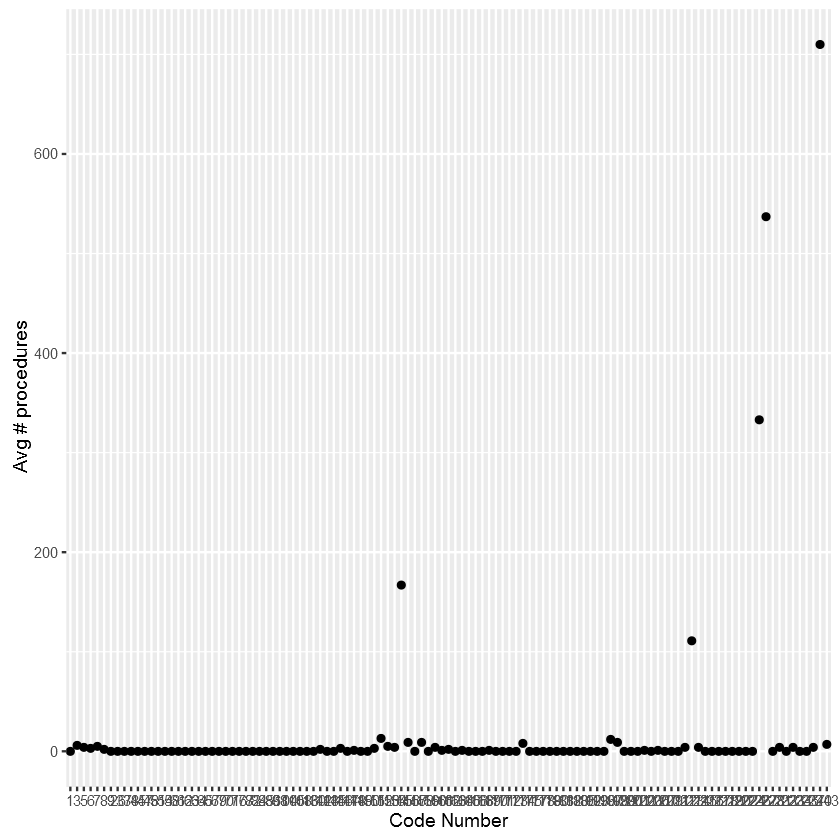

In [54]:
qplot(ccs_code, V1, data=cnt_per_code) + labs(x='Code Number', y='Avg # procedures')
